In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [3]:
data_train_path = 'C:/Users/Rutuja/Downloads/Image_classification/train'
data_test_path = 'C:/Users/Rutuja/Downloads/Image_classification/test'
data_val_path = 'C:/Users/Rutuja/Downloads/Image_classification/validation'

In [4]:
img_width = 180
img_height =180 

In [5]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 5099 files belonging to 5 classes.


In [6]:
data_cat = data_train.class_names

In [7]:
data_cat

['Alternaria', 'Anthracnose', 'Bacterial_Blight', 'Cercospora', 'healthy']

In [8]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 50 files belonging to 5 classes.


In [9]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 5099 files belonging to 5 classes.


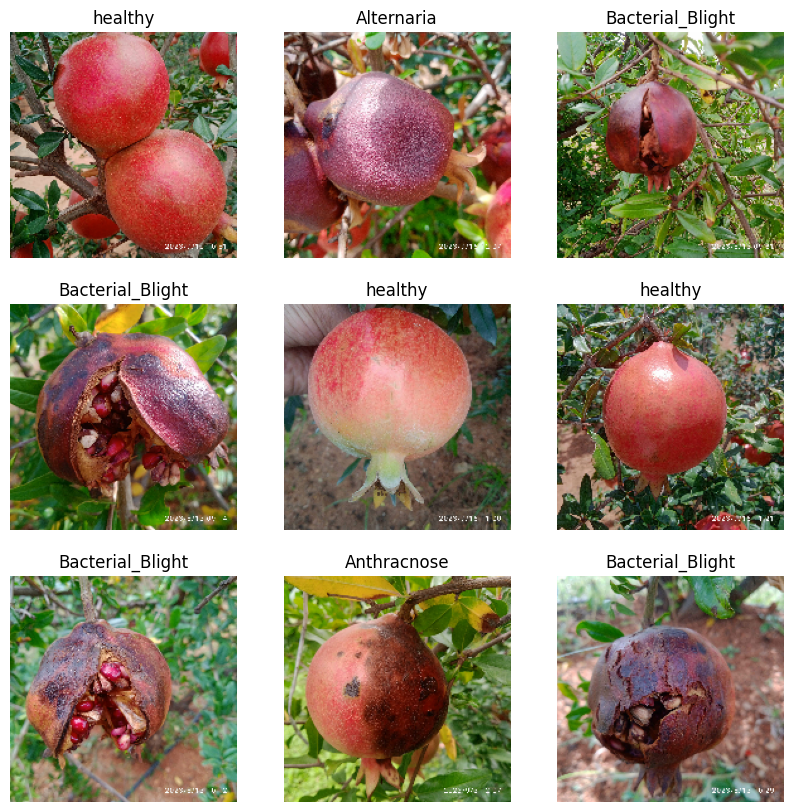

In [10]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [11]:
from tensorflow.keras.models import Sequential

In [12]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [14]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [15]:
epochs_size = 20
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 67s 402ms/step - accuracy: 0.5560 - loss: 2.0179 - val_accuracy: 0.9000 - val_loss: 0.2483
Epoch 2/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 326ms/step - accuracy: 0.9419 - loss: 0.1850 - val_accuracy: 0.8600 - val_loss: 0.4164
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 323ms/step - accuracy: 0.9715 - loss: 0.0933 - val_accuracy: 0.9800 - val_loss: 0.0601
Epoch 4/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 53s 330ms/step - accuracy: 0.9869 - loss: 0.0392 - val_accuracy: 0.9800 - val_loss: 0.0319
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 52s 326ms/step - accuracy: 0.9947 - loss: 0.0180 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 49s 308ms/step - accuracy: 0.9974 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0277
Epoch 7/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 47s 291ms/step - accuracy: 0.9913 - loss: 0.0331 - val_accuracy: 0.9800 - val_loss: 0.0351
Epoch 8/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 46s 290ms/step - accuracy: 0.9991 - loss: 0

Text(0.5, 1.0, 'Loss')

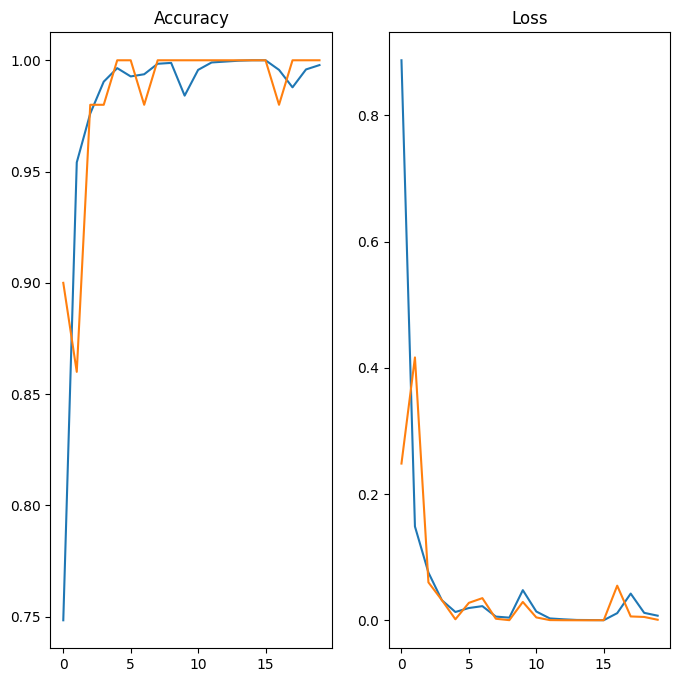

In [16]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [17]:
image = 'Alternaria.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [18]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


In [19]:
score = tf.nn.softmax(predict)

In [20]:
print('disease in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

disease in image is Alternaria with accuracy of 99.99


In [21]:
model.save('Image_classify.keras')